In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"] = (df["class"] == "g").astype(int)

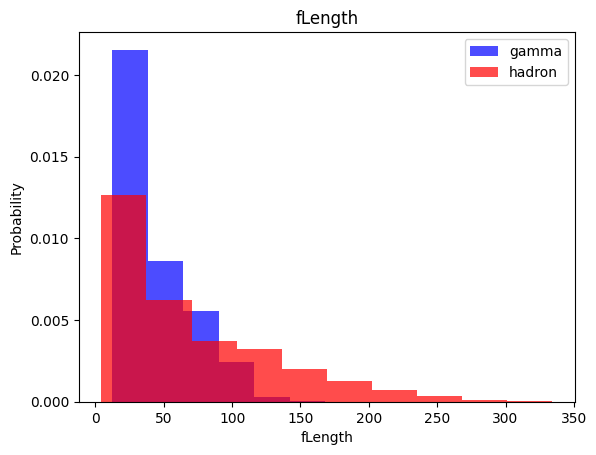

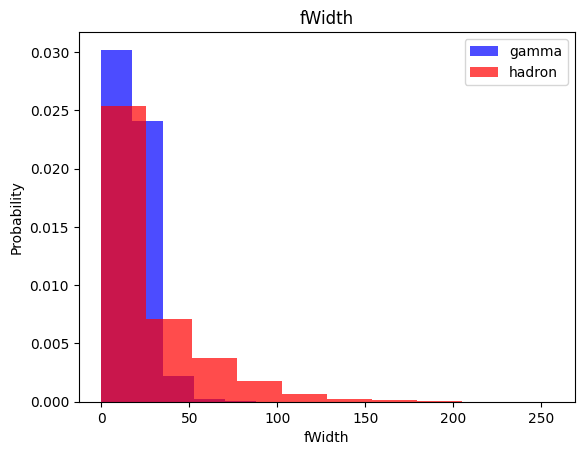

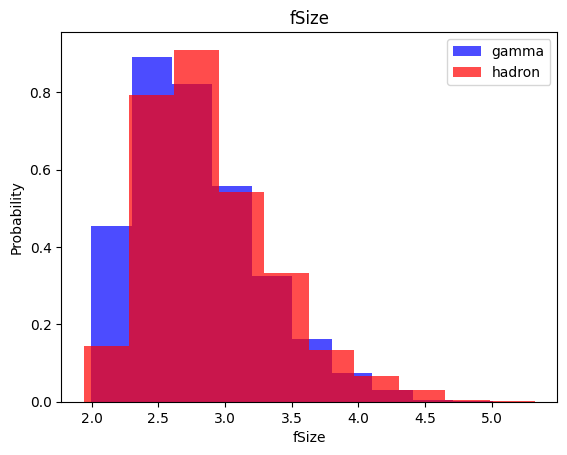

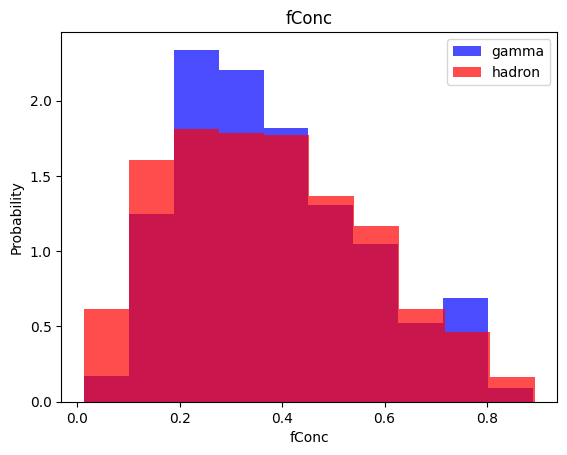

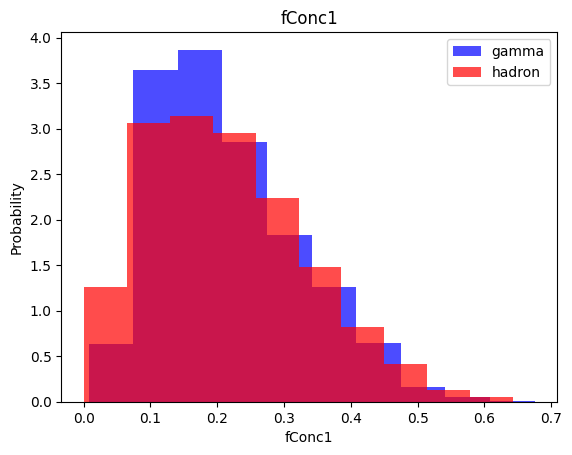

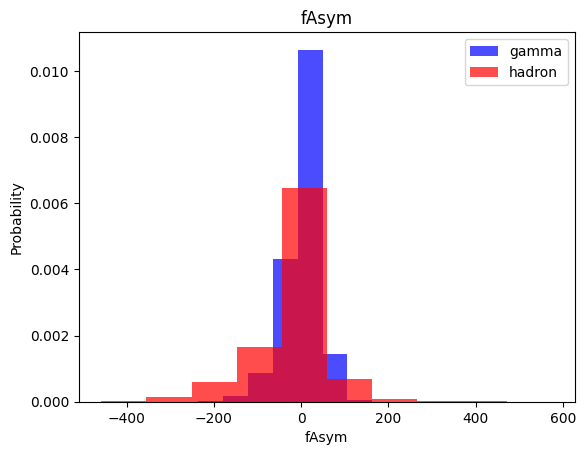

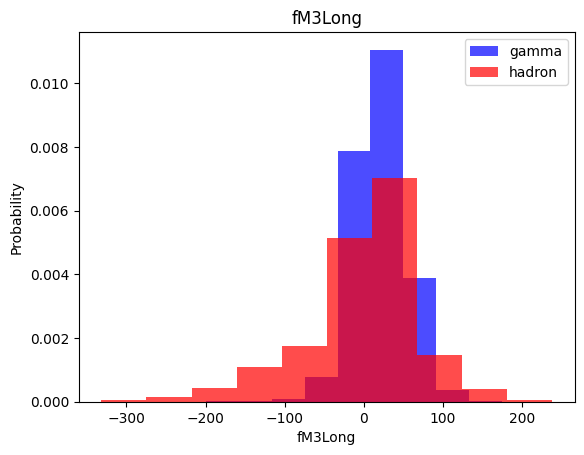

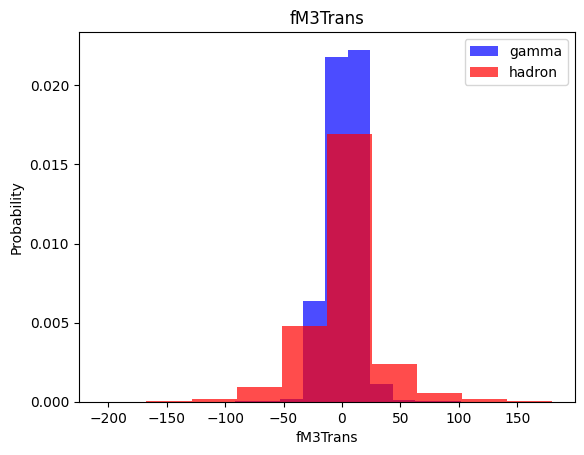

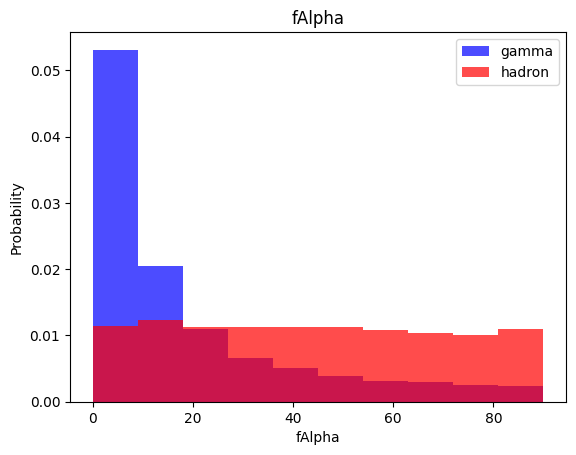

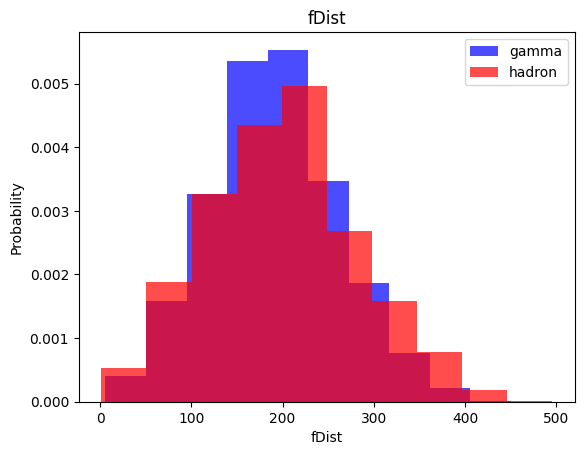

In [4]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color="blue", label = 'gamma', alpha = 0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color="red", label = 'hadron', alpha = 0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [6]:
def scale_dataset(dataframe, oversample=False):
  # Get all columns except class
  x = dataframe[dataframe.columns[:-1]].values

  # Get class column
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  # Scale x values
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  # np.reshape to convert y from a vector to a 2D array
  data = np.hstack((x, np.reshape(y, (-1,1))))

  return data, x, y


In [7]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

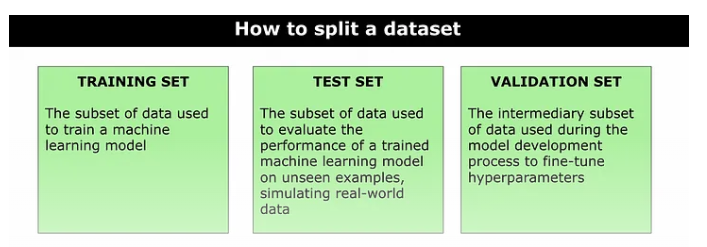

# kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = knn_model.predict(x_test)

In [11]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1352
           1       0.85      0.84      0.85      2452

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
nb_model = GaussianNB()
nb_model =nb_model.fit(x_train, y_train)

In [14]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1352
           1       0.72      0.89      0.80      2452

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [17]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1352
           1       0.84      0.82      0.83      2452

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.78      3804



# SVM

In [18]:
from sklearn.svm import SVC

In [19]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [20]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1352
           1       0.89      0.90      0.90      2452

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [26]:
import tensorflow as tf

In [27]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)


  plt.show()

In [41]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):

  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss ='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=0.2, verbose=0)

  return nn_model, history



16 nodes, dropout 0, lr 0.005, batch_size 32 


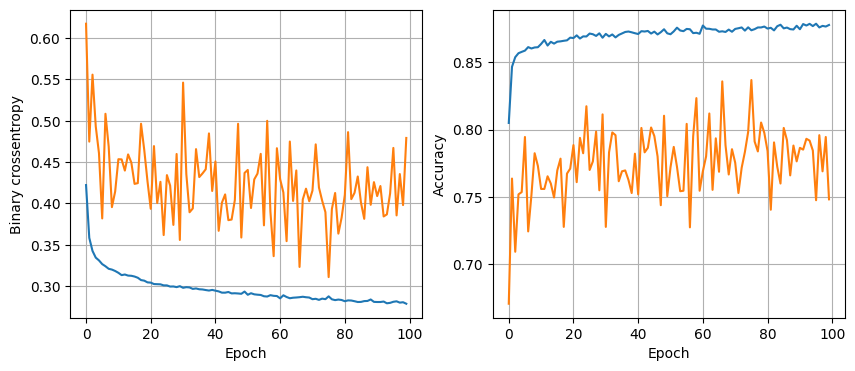

119/119 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8817
16 nodes, dropout 0, lr 0.005, batch_size 64 


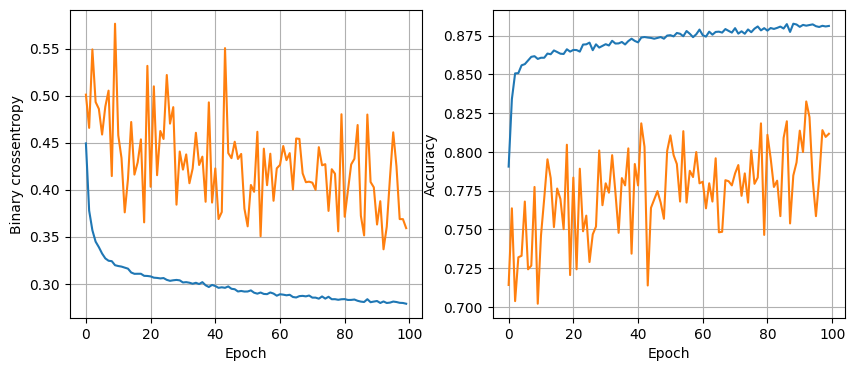

119/119 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.8754
16 nodes, dropout 0, lr 0.005, batch_size 128 


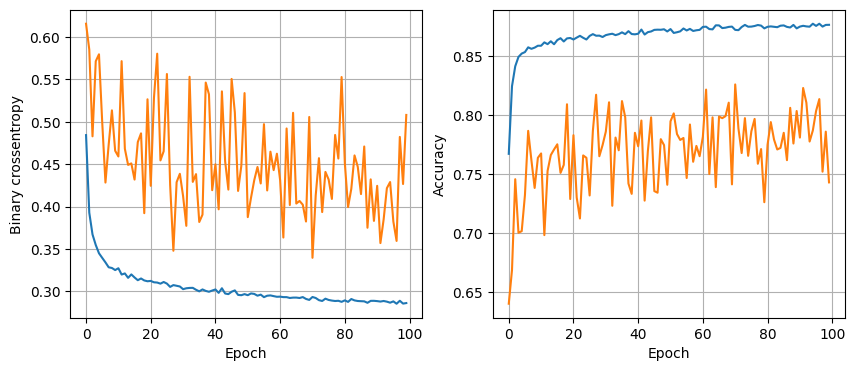

119/119 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8864
16 nodes, dropout 0, lr 0.001, batch_size 32 


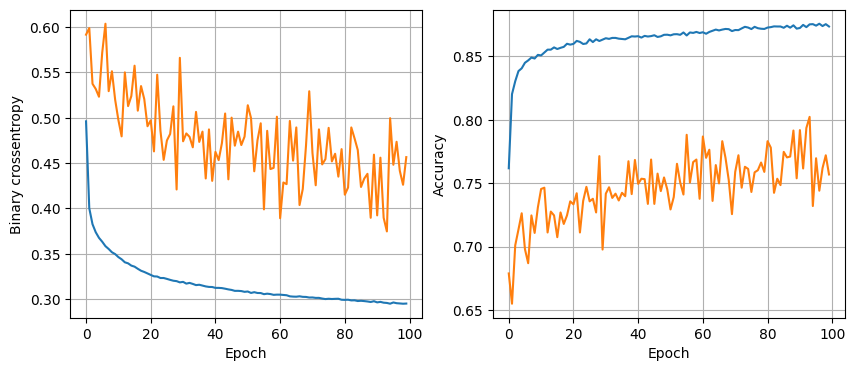

119/119 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.8825
16 nodes, dropout 0, lr 0.001, batch_size 64 


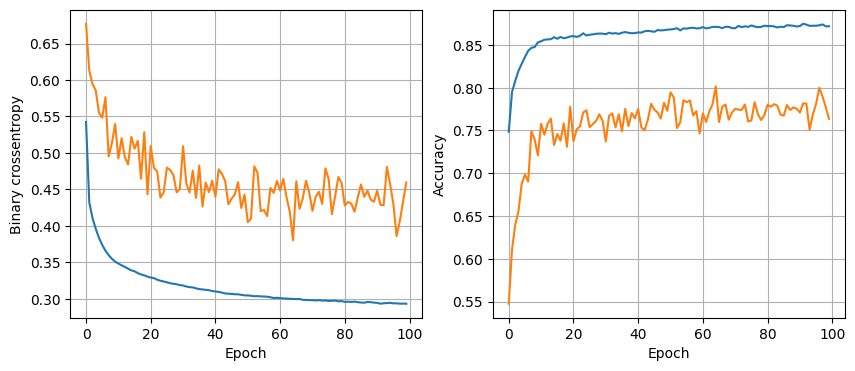

119/119 [==============================] - 0s 3ms/step - loss: 0.2955 - accuracy: 0.8820
16 nodes, dropout 0, lr 0.001, batch_size 128 


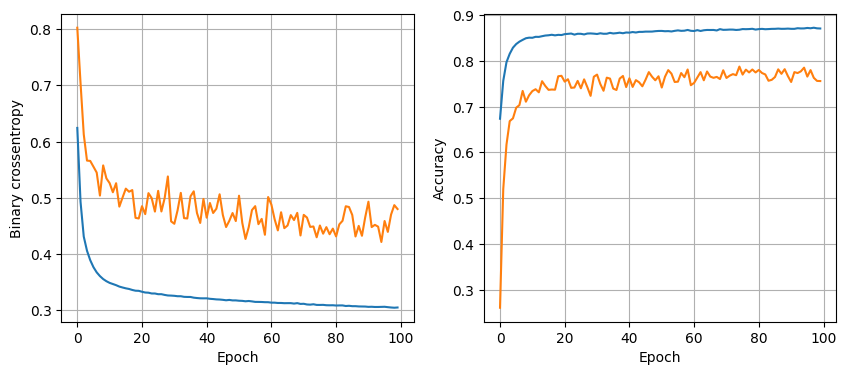

119/119 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8817
16 nodes, dropout 0, lr 0.01, batch_size 32 


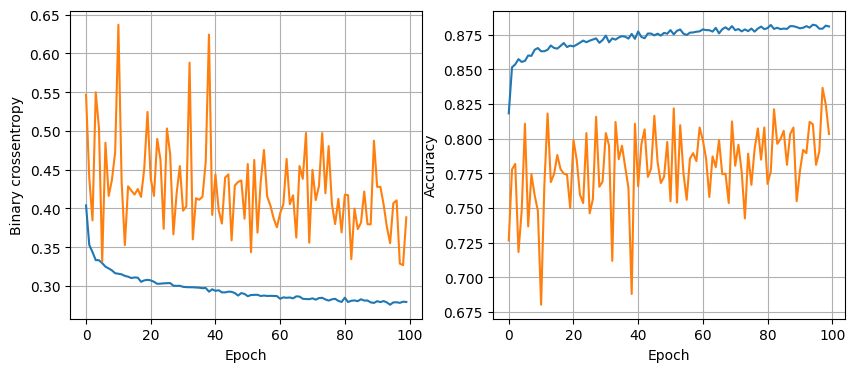

119/119 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8814
16 nodes, dropout 0, lr 0.01, batch_size 64 


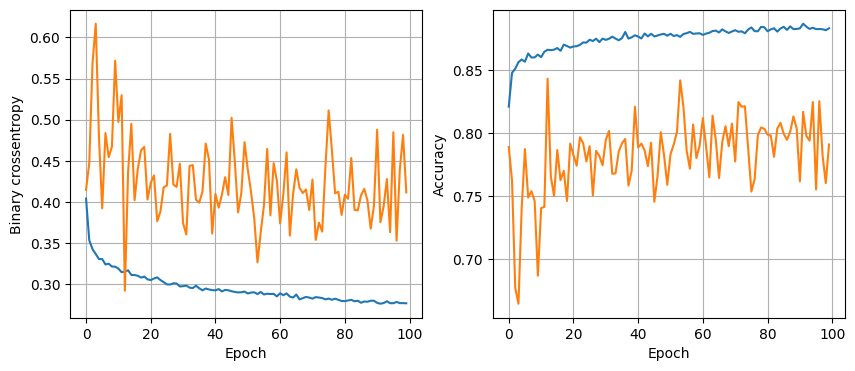

119/119 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8812
16 nodes, dropout 0, lr 0.01, batch_size 128 


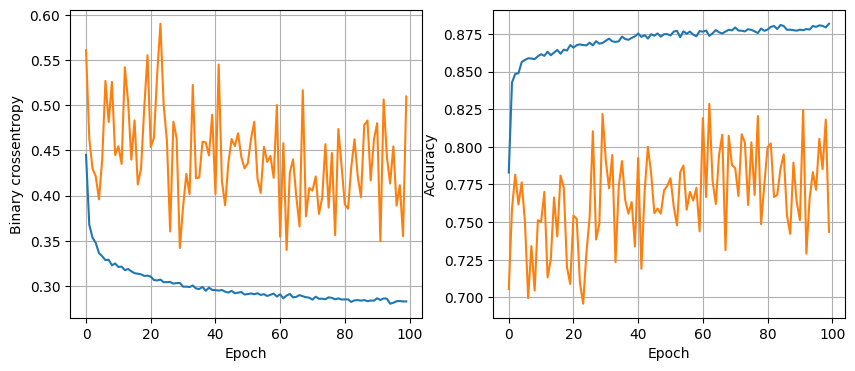

119/119 [==============================] - 0s 3ms/step - loss: 0.3092 - accuracy: 0.8833
16 nodes, dropout 0.2, lr 0.005, batch_size 32 


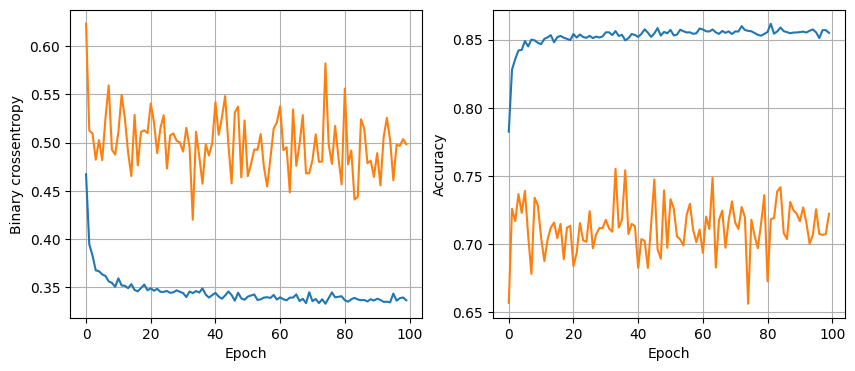

119/119 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8780
16 nodes, dropout 0.2, lr 0.005, batch_size 64 


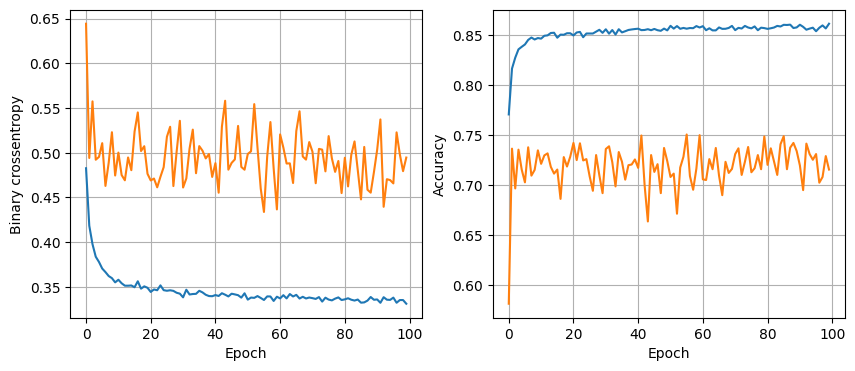

119/119 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8757
16 nodes, dropout 0.2, lr 0.005, batch_size 128 


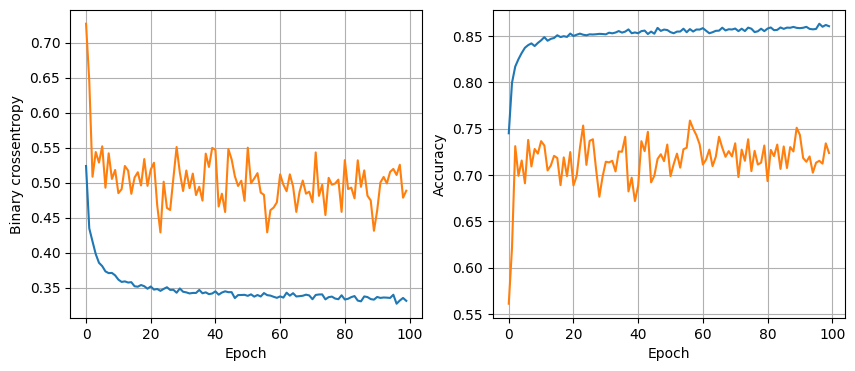

119/119 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8751
16 nodes, dropout 0.2, lr 0.001, batch_size 32 


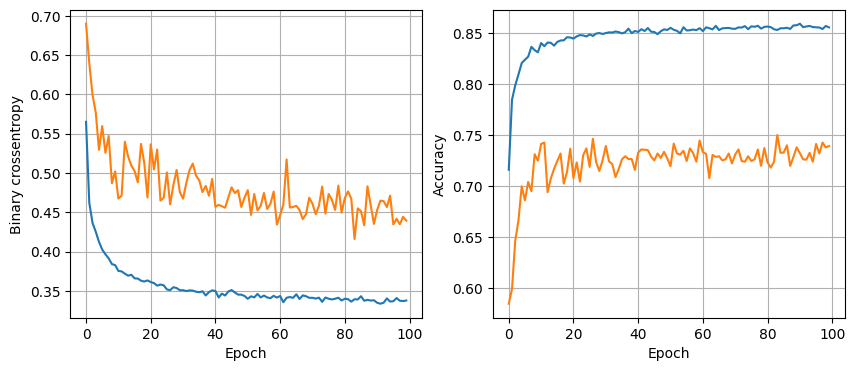

119/119 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8793
16 nodes, dropout 0.2, lr 0.001, batch_size 64 


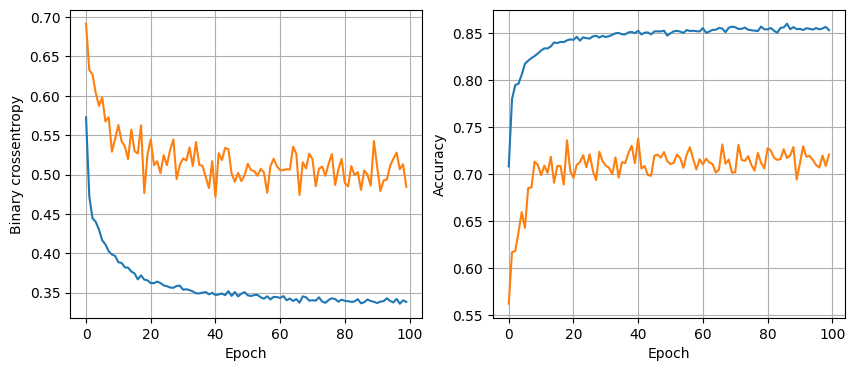

119/119 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8801
16 nodes, dropout 0.2, lr 0.001, batch_size 128 


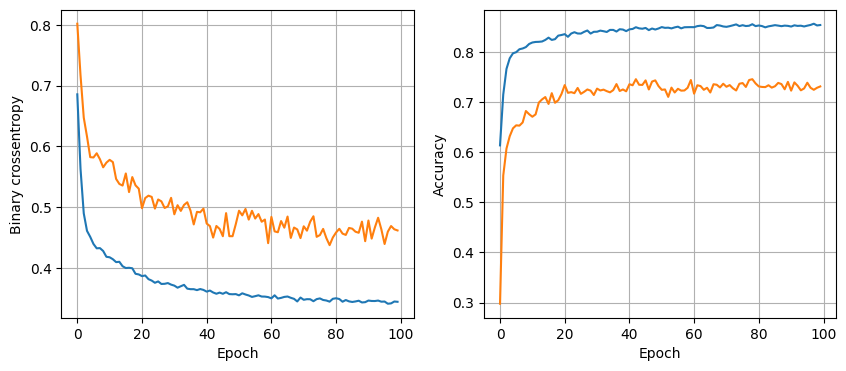

119/119 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8809
16 nodes, dropout 0.2, lr 0.01, batch_size 32 


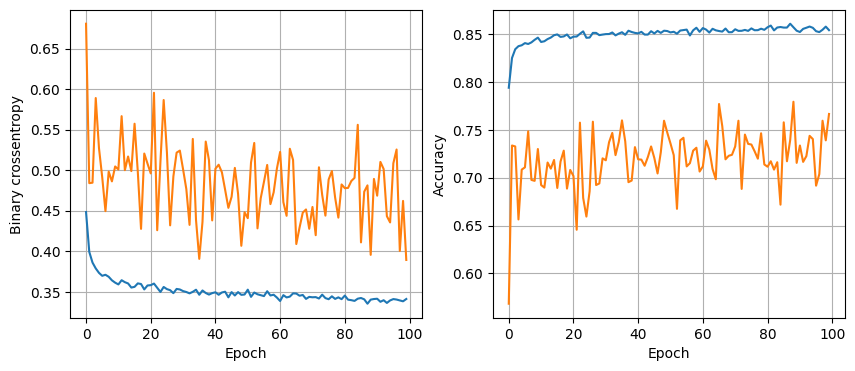

119/119 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8817
16 nodes, dropout 0.2, lr 0.01, batch_size 64 


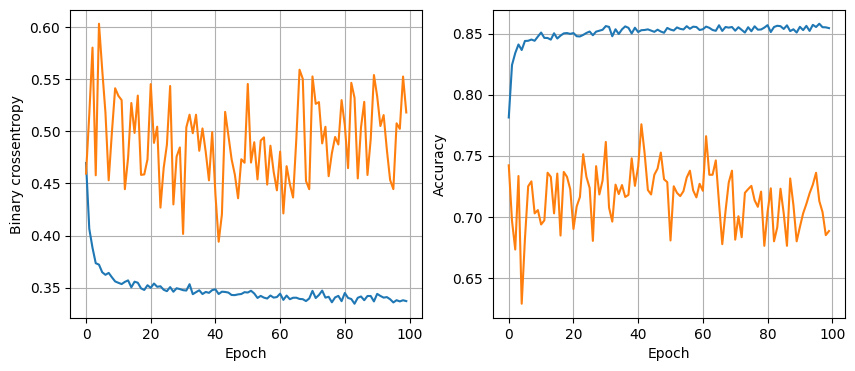

119/119 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8717
16 nodes, dropout 0.2, lr 0.01, batch_size 128 


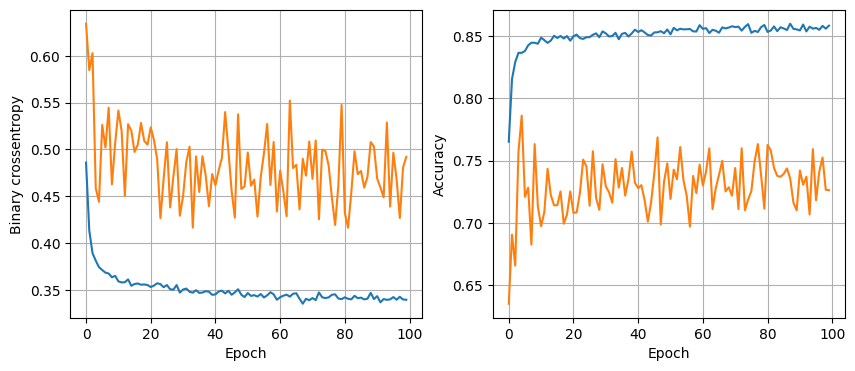

119/119 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8764
32 nodes, dropout 0, lr 0.005, batch_size 32 


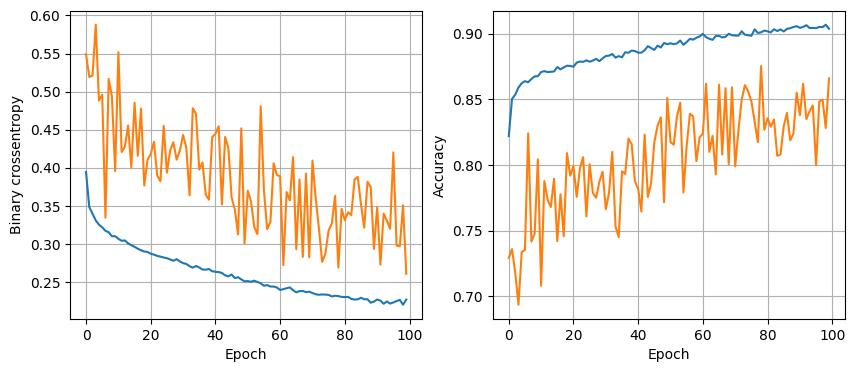

119/119 [==============================] - 0s 3ms/step - loss: 0.3836 - accuracy: 0.8583
32 nodes, dropout 0, lr 0.005, batch_size 64 


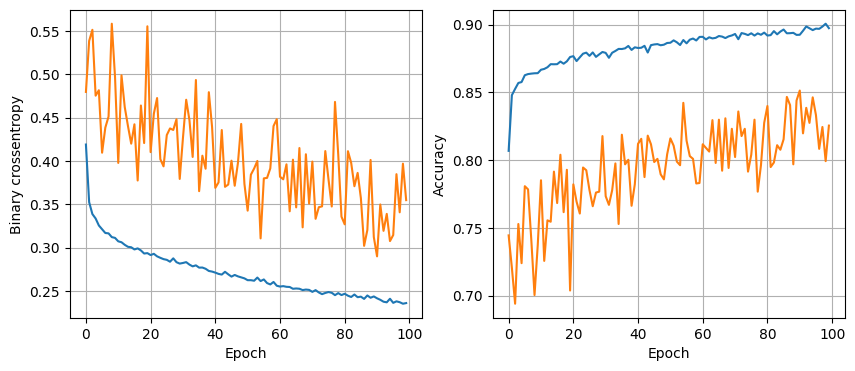

119/119 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8743
32 nodes, dropout 0, lr 0.005, batch_size 128 


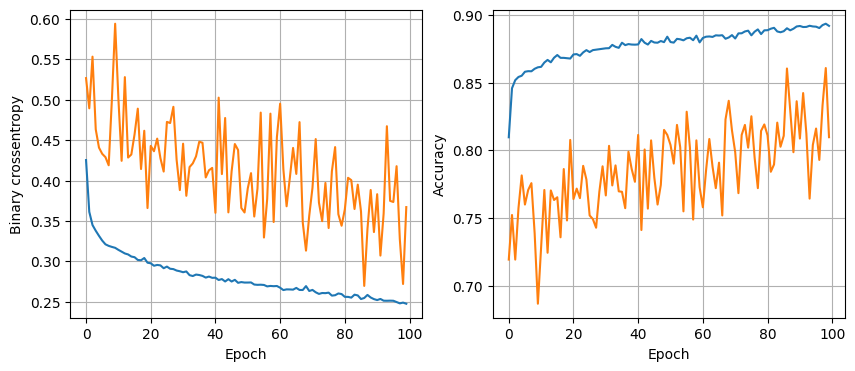

119/119 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8751
32 nodes, dropout 0, lr 0.001, batch_size 32 


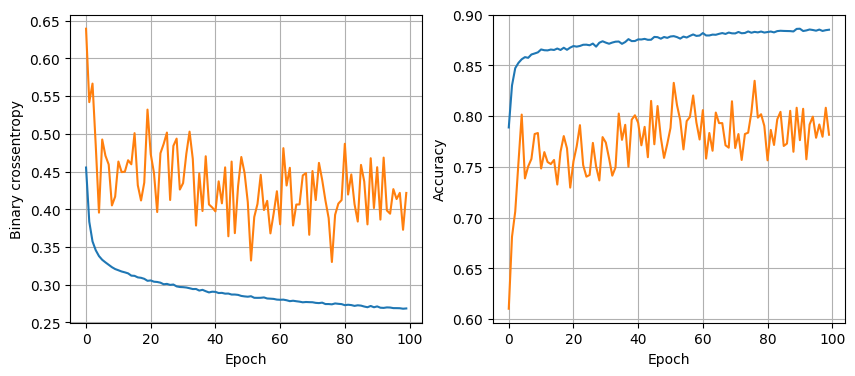

119/119 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8809
32 nodes, dropout 0, lr 0.001, batch_size 64 


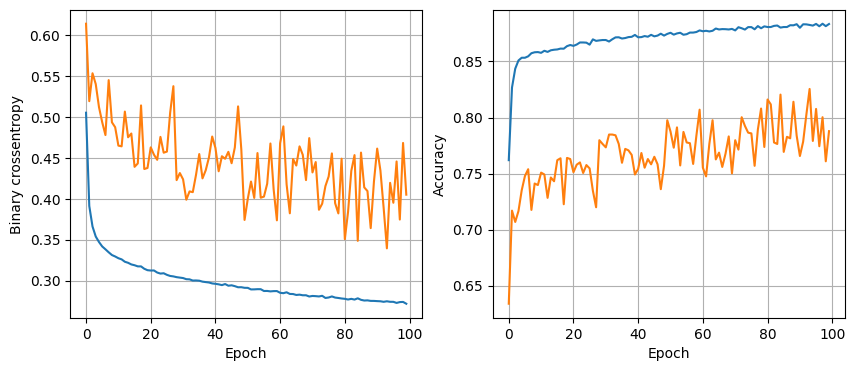

119/119 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.8796
32 nodes, dropout 0, lr 0.001, batch_size 128 


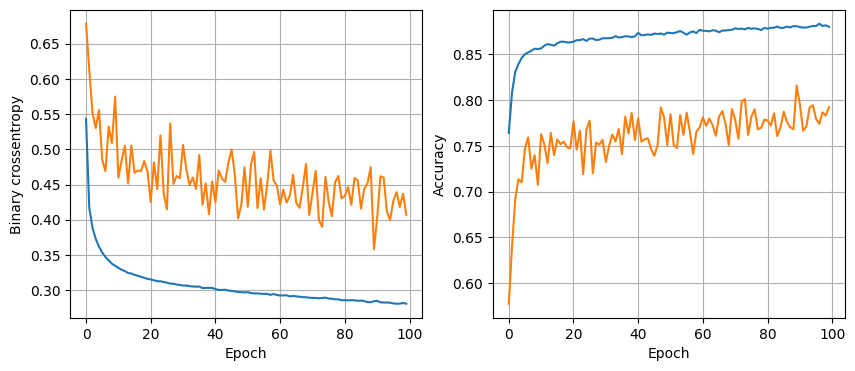

119/119 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.8807
32 nodes, dropout 0, lr 0.01, batch_size 32 


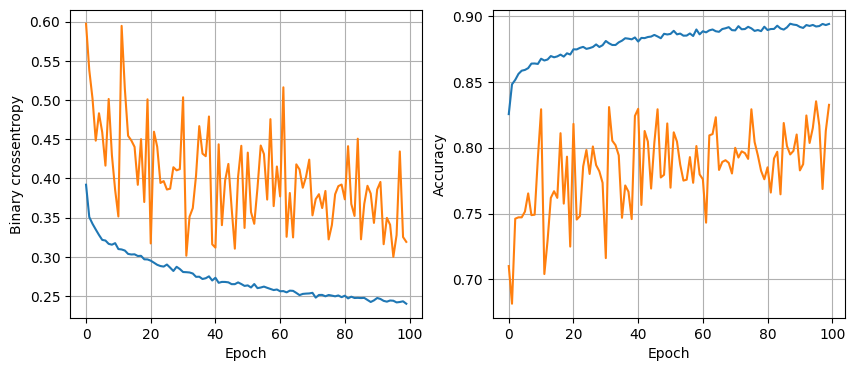

119/119 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8775
32 nodes, dropout 0, lr 0.01, batch_size 64 


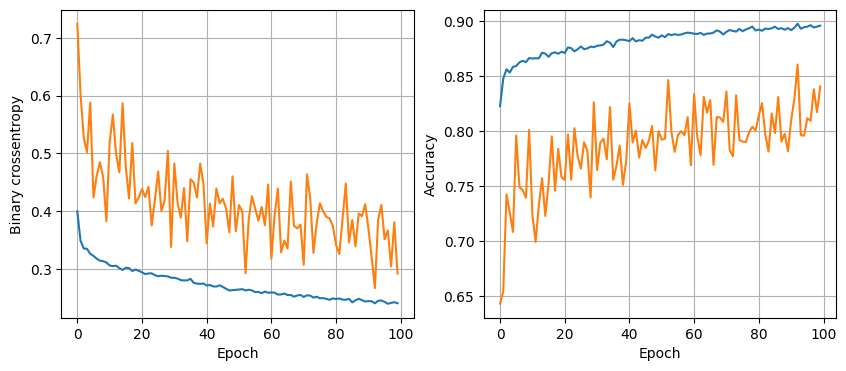

119/119 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.01, batch_size 128 


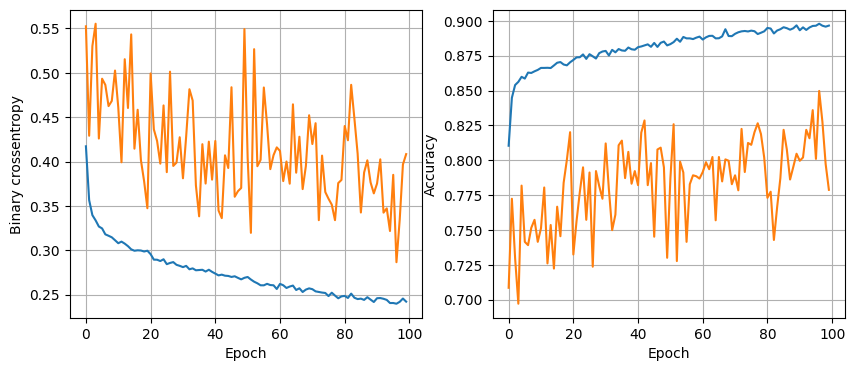

119/119 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8675
32 nodes, dropout 0.2, lr 0.005, batch_size 32 


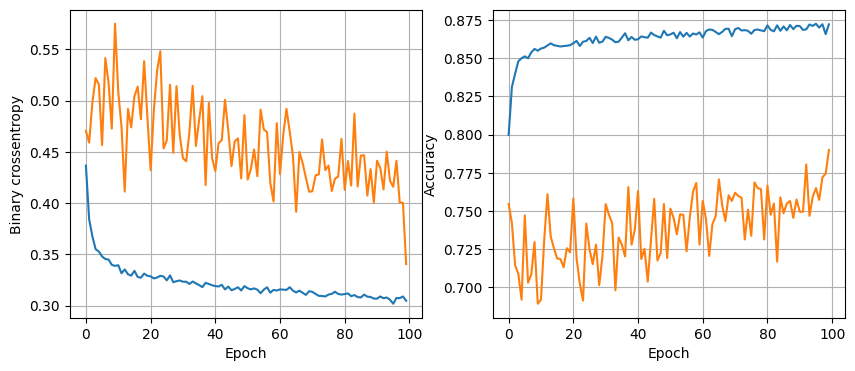

119/119 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8872
32 nodes, dropout 0.2, lr 0.005, batch_size 64 


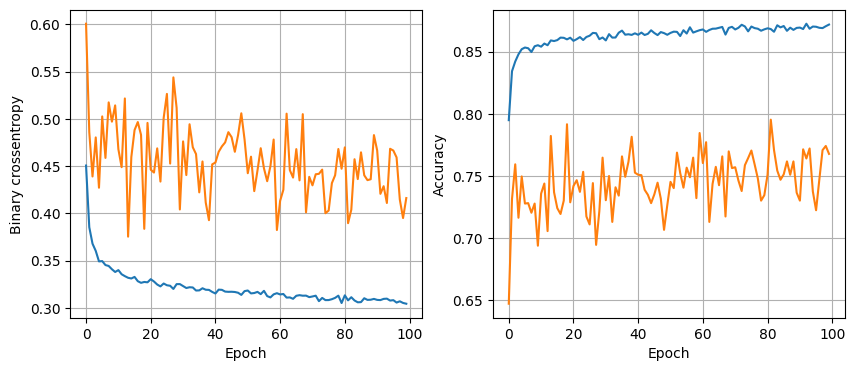

119/119 [==============================] - 0s 4ms/step - loss: 0.2958 - accuracy: 0.8796
32 nodes, dropout 0.2, lr 0.005, batch_size 128 


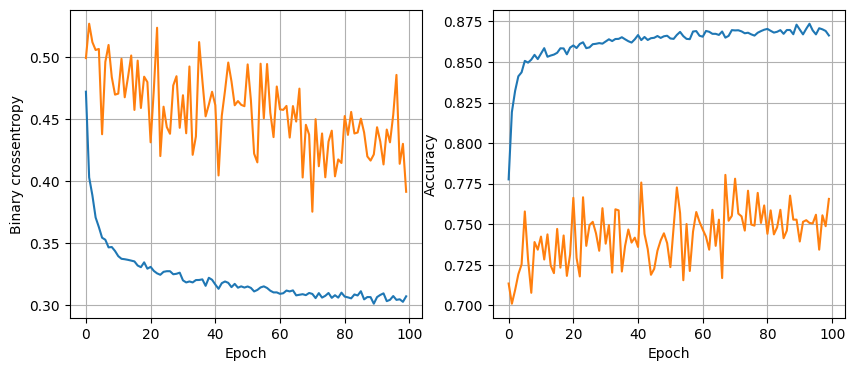

119/119 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.8804
32 nodes, dropout 0.2, lr 0.001, batch_size 32 


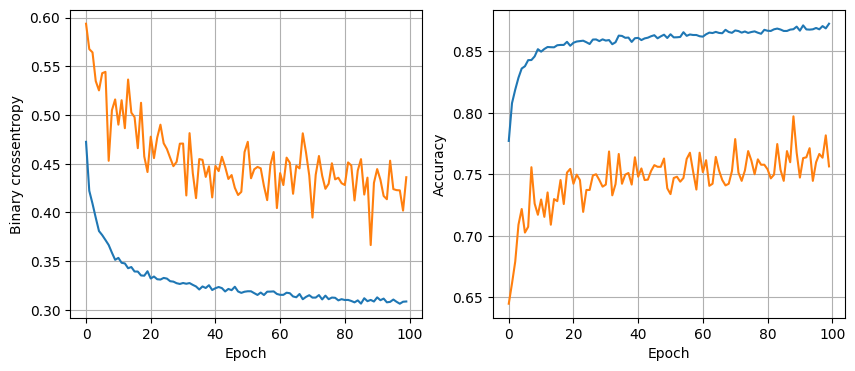

119/119 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.8828
32 nodes, dropout 0.2, lr 0.001, batch_size 64 


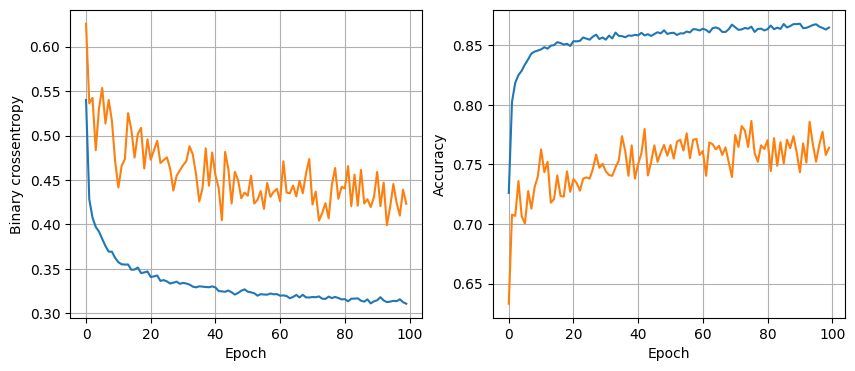

119/119 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.8856
32 nodes, dropout 0.2, lr 0.001, batch_size 128 


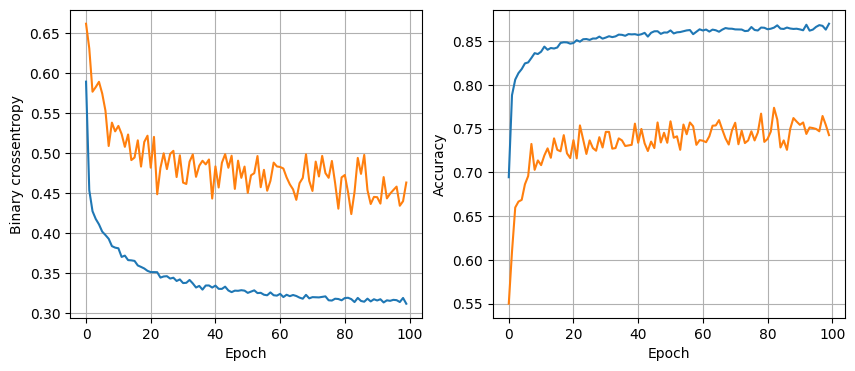

119/119 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.8851
32 nodes, dropout 0.2, lr 0.01, batch_size 32 


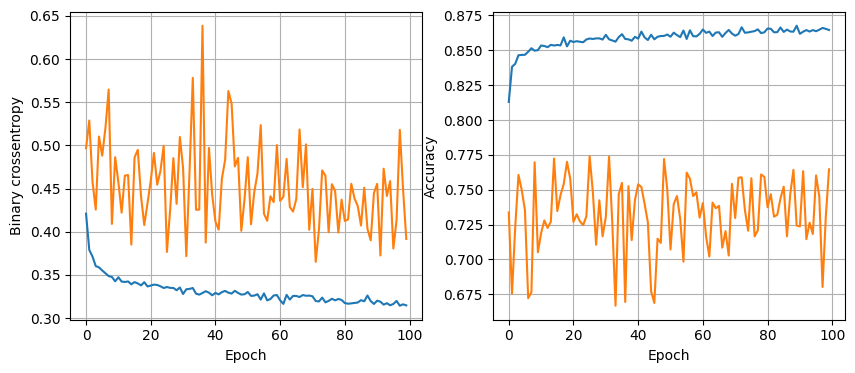

119/119 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.8854
32 nodes, dropout 0.2, lr 0.01, batch_size 64 


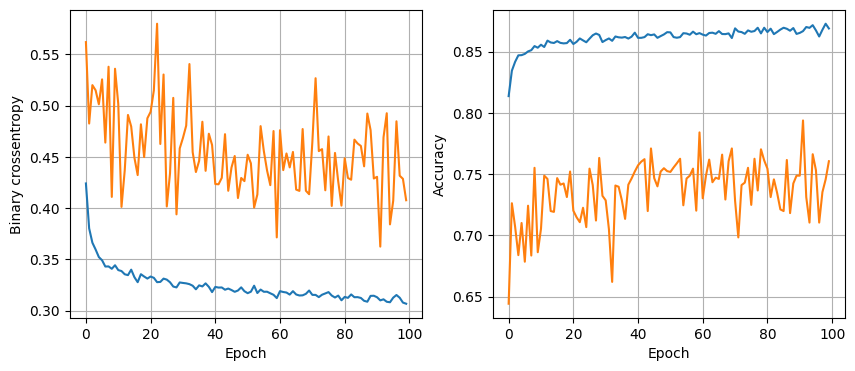

119/119 [==============================] - 0s 3ms/step - loss: 0.2958 - accuracy: 0.8820
32 nodes, dropout 0.2, lr 0.01, batch_size 128 


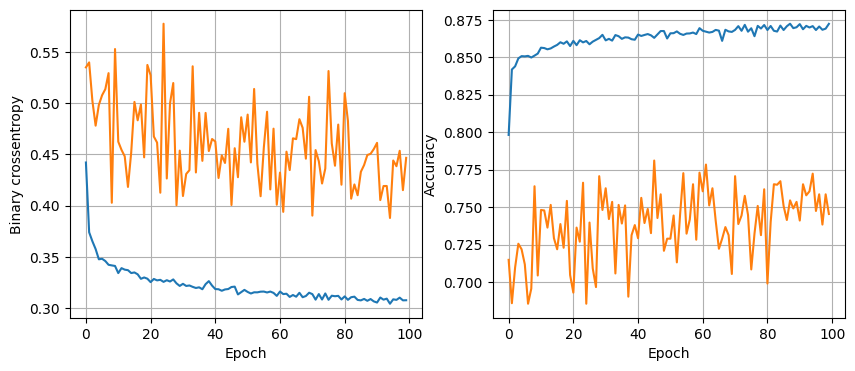

119/119 [==============================] - 0s 3ms/step - loss: 0.2928 - accuracy: 0.8841
64 nodes, dropout 0, lr 0.005, batch_size 32 


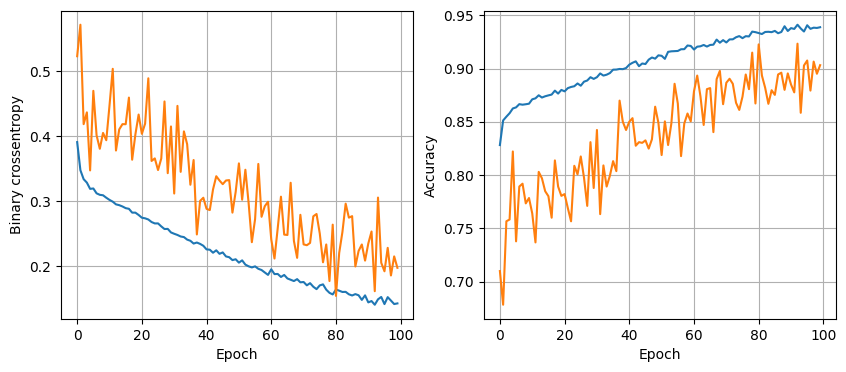

119/119 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.8536
64 nodes, dropout 0, lr 0.005, batch_size 64 


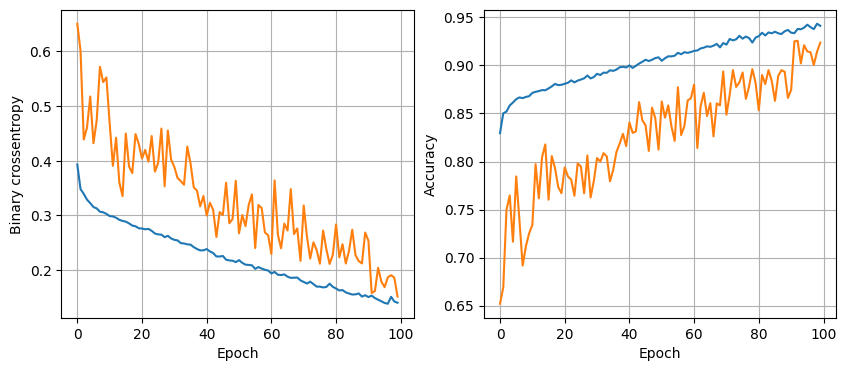

119/119 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.8546
64 nodes, dropout 0, lr 0.005, batch_size 128 


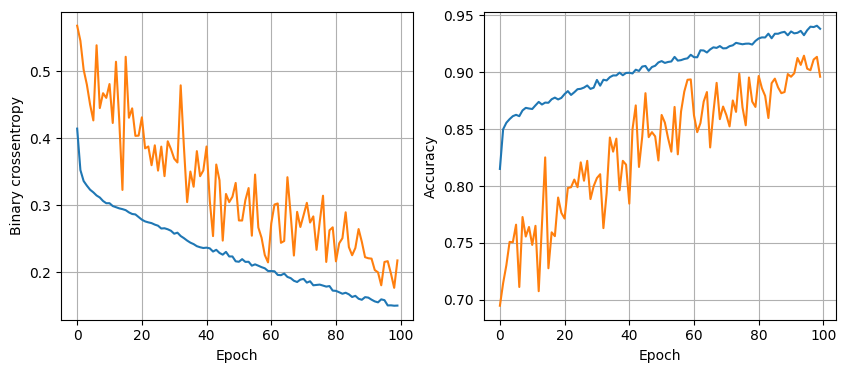

119/119 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.8654
64 nodes, dropout 0, lr 0.001, batch_size 32 


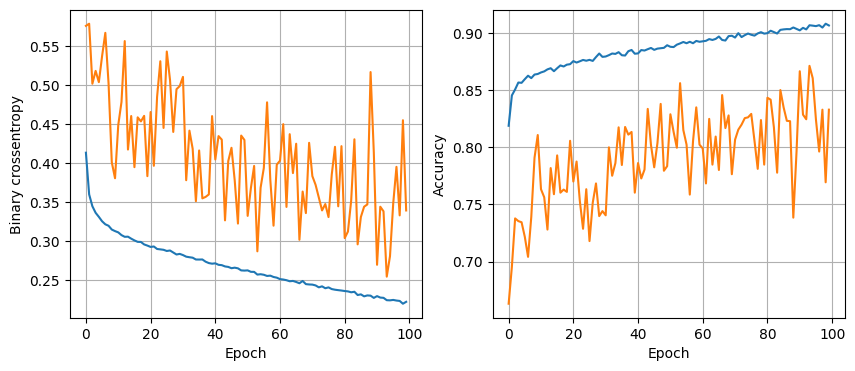

119/119 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8775
64 nodes, dropout 0, lr 0.001, batch_size 64 


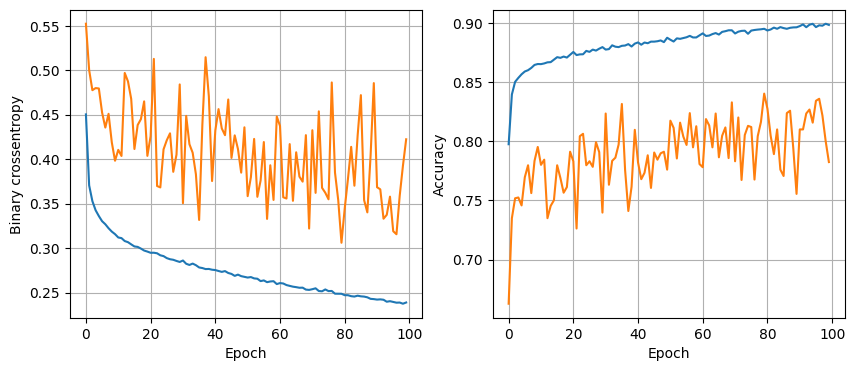

119/119 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.8780
64 nodes, dropout 0, lr 0.001, batch_size 128 


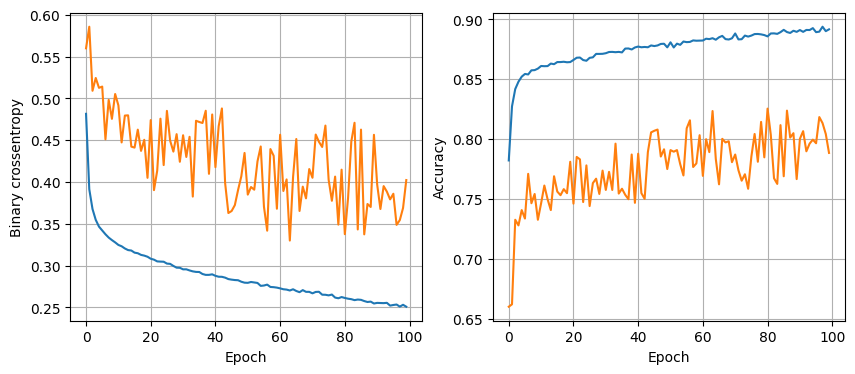

119/119 [==============================] - 0s 3ms/step - loss: 0.3104 - accuracy: 0.8772
64 nodes, dropout 0, lr 0.01, batch_size 32 


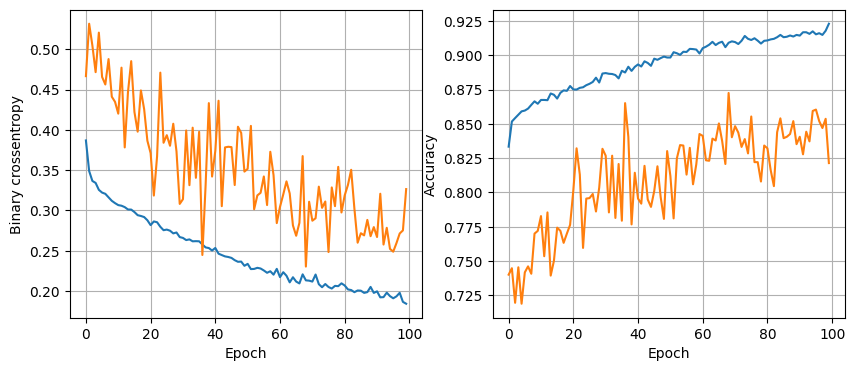

119/119 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.8683
64 nodes, dropout 0, lr 0.01, batch_size 64 


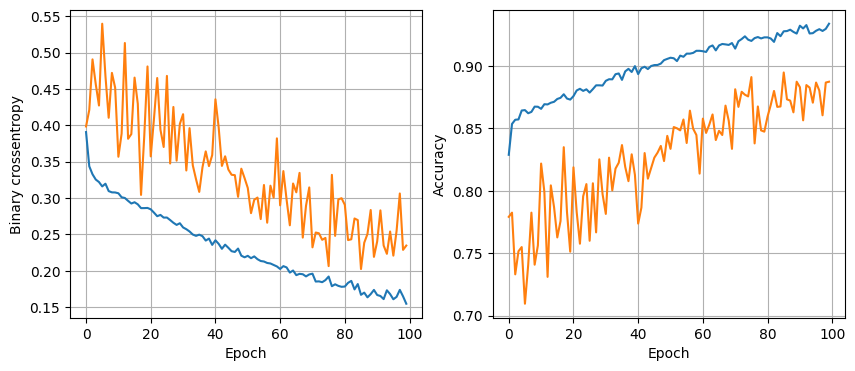

119/119 [==============================] - 0s 4ms/step - loss: 0.5363 - accuracy: 0.8680
64 nodes, dropout 0, lr 0.01, batch_size 128 


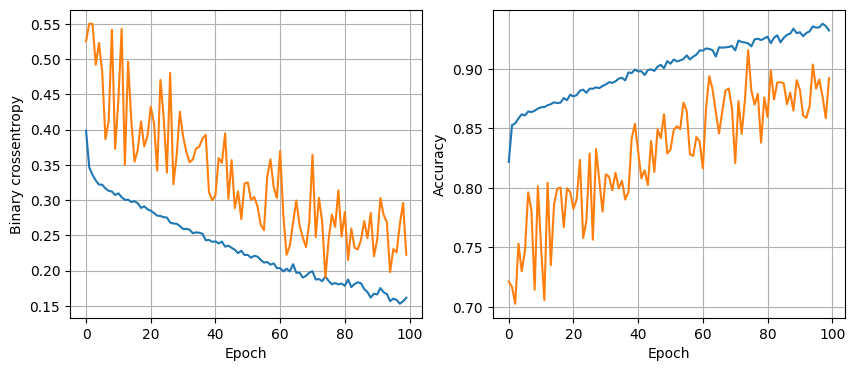

119/119 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.8594
64 nodes, dropout 0.2, lr 0.005, batch_size 32 


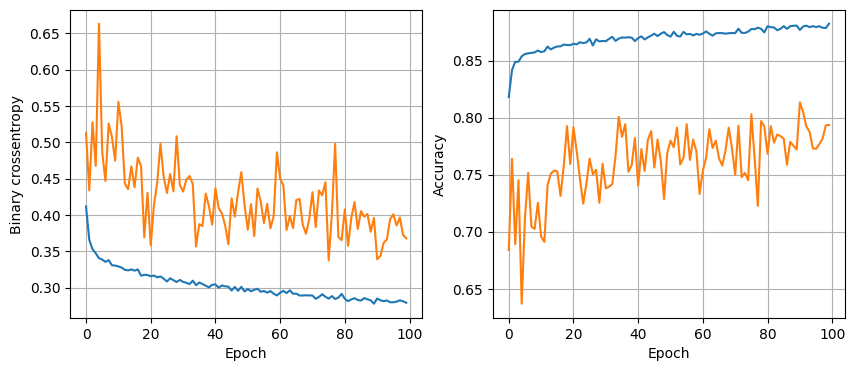

119/119 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.8893
64 nodes, dropout 0.2, lr 0.005, batch_size 64 


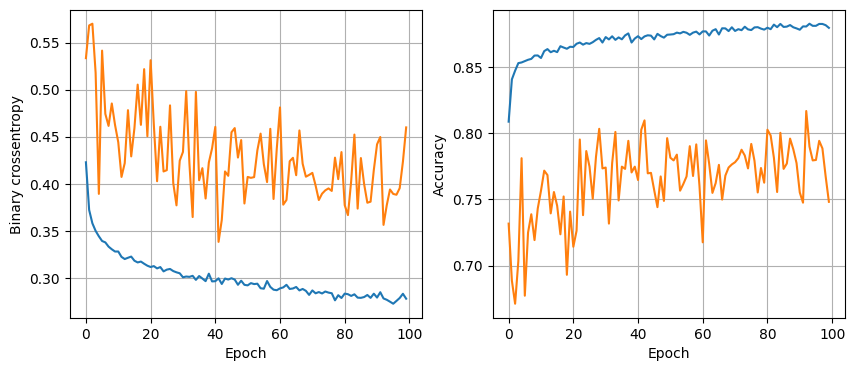

119/119 [==============================] - 0s 3ms/step - loss: 0.2976 - accuracy: 0.8767
64 nodes, dropout 0.2, lr 0.005, batch_size 128 


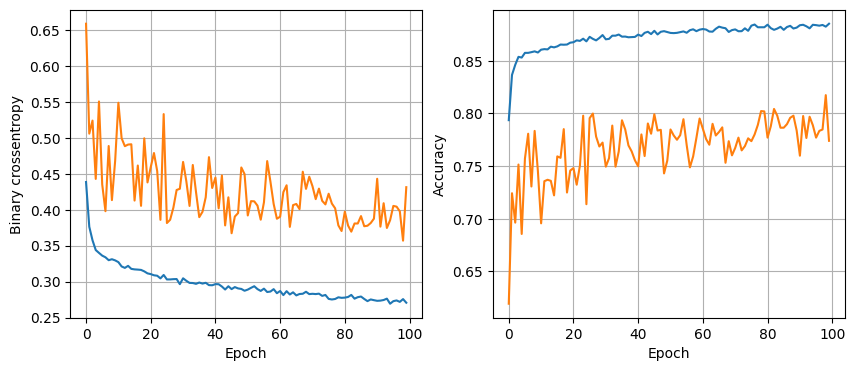

119/119 [==============================] - 0s 3ms/step - loss: 0.2863 - accuracy: 0.8814
64 nodes, dropout 0.2, lr 0.001, batch_size 32 


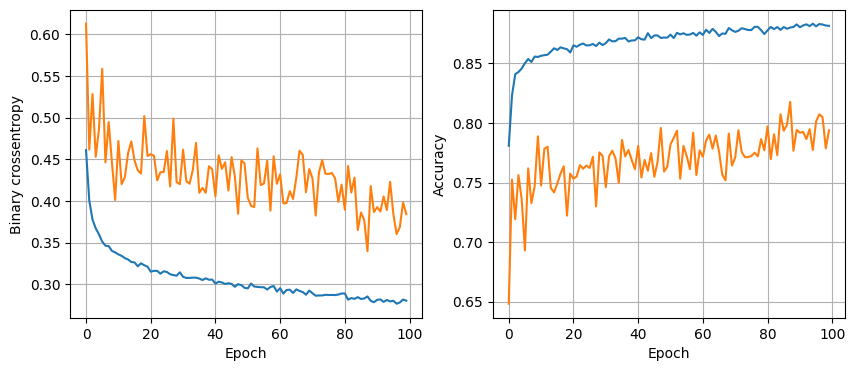

119/119 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.8877
64 nodes, dropout 0.2, lr 0.001, batch_size 64 


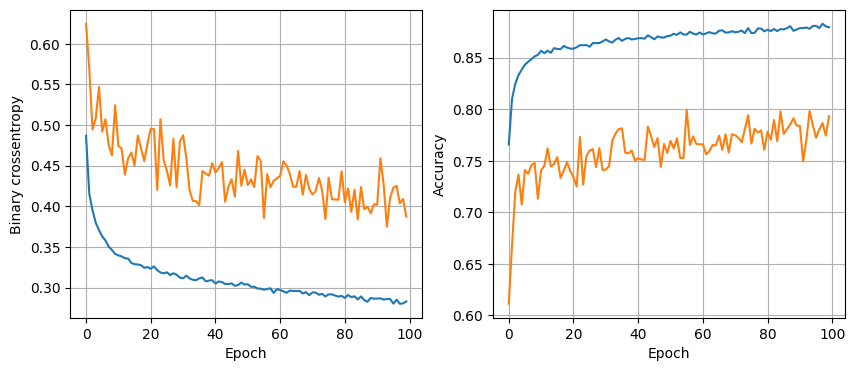

119/119 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.8856
64 nodes, dropout 0.2, lr 0.001, batch_size 128 


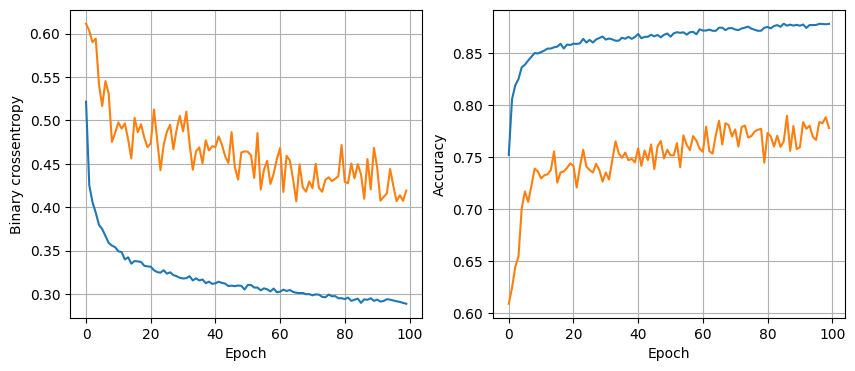

119/119 [==============================] - 0s 3ms/step - loss: 0.2862 - accuracy: 0.8877
64 nodes, dropout 0.2, lr 0.01, batch_size 32 


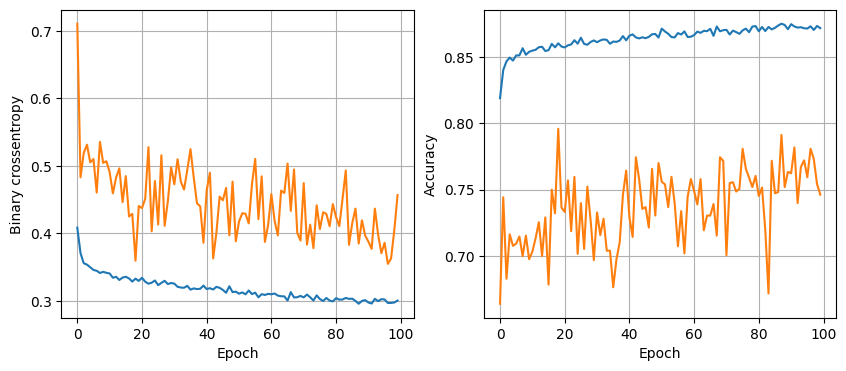

119/119 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8746
64 nodes, dropout 0.2, lr 0.01, batch_size 64 


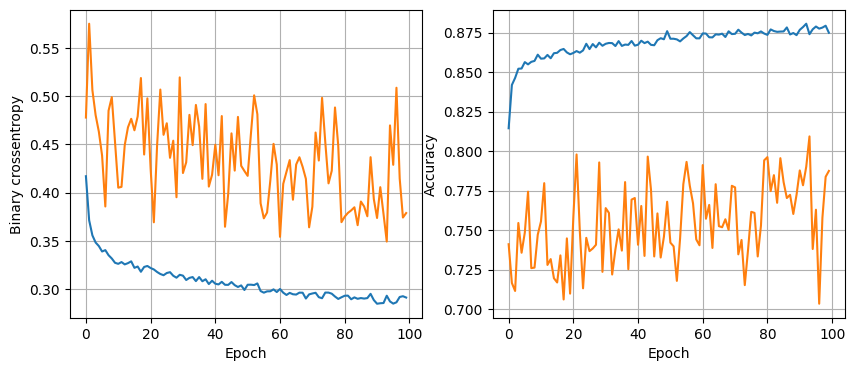

119/119 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8843
64 nodes, dropout 0.2, lr 0.01, batch_size 128 


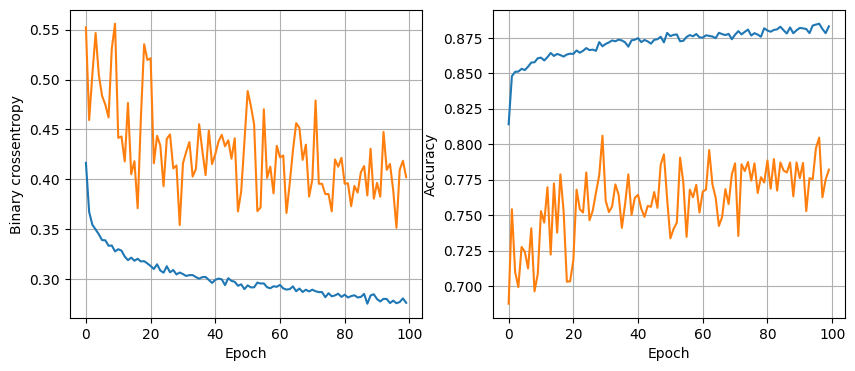

119/119 [==============================] - 0s 3ms/step - loss: 0.2876 - accuracy: 0.8833


In [42]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.005, 0.001, 0.01]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size} ")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [55]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )

119/119 [==============================] - 0s 3ms/step


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1352
           1       0.89      0.94      0.91      2452

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

